In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Generator model
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim, activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.Dense(512, activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.Dense(784))  # Output layer with 784 units (for MNIST images)
    return model

In [14]:
# Discriminator model
def build_discriminator():
    model = keras.Sequential()
    model.add(layers.Dense(512, input_shape=(784,), activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.Dense(256, activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.Dense(128, activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with a single unit (real or fake)
    return model

In [15]:
# Define the generator and discriminator
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

In [16]:
# Define the loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy()

# Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [17]:
# Define the optimizers for generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [18]:
# Training loop
@tf.function
def train_step(images):
    batch_size = tf.shape(images)[0]
    noise = tf.random.normal([batch_size, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [19]:
# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape(train_images.shape[0], 784)

In [20]:
# Hyperparameters
epochs = 500
batch_size = 128
steps_per_epoch = train_images.shape[0] // batch_size


In [21]:
# Create a dataset and shuffle it
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(train_images.shape[0]).batch(batch_size)


Current epoch is 0


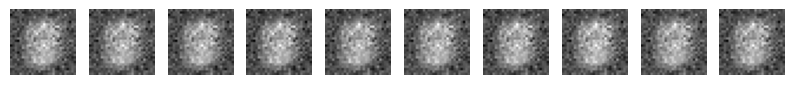

Current epoch is 10


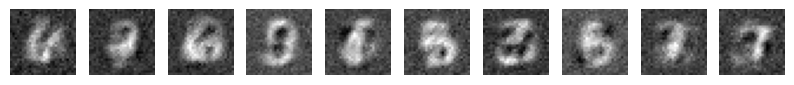

Current epoch is 20


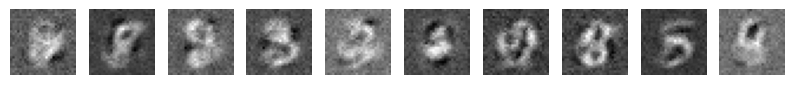

Current epoch is 30


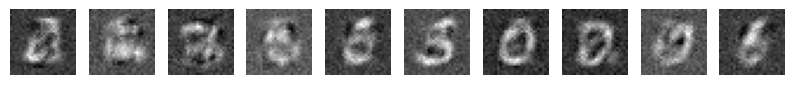

Current epoch is 40


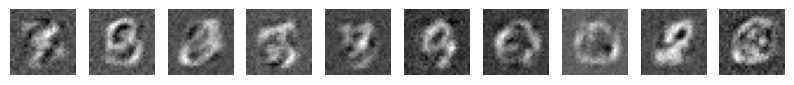

Current epoch is 50


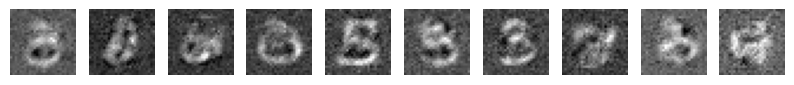

Current epoch is 60


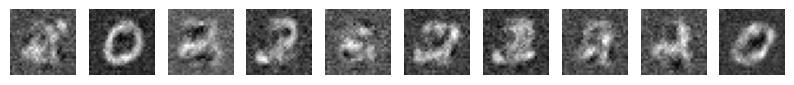

Current epoch is 70


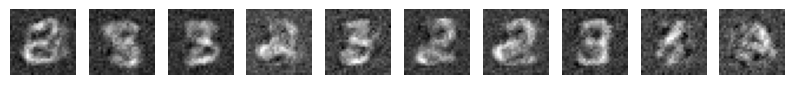

Current epoch is 80


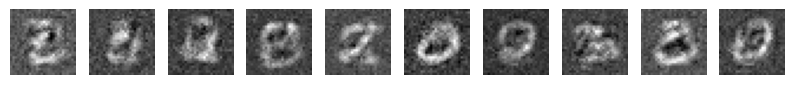

Current epoch is 90


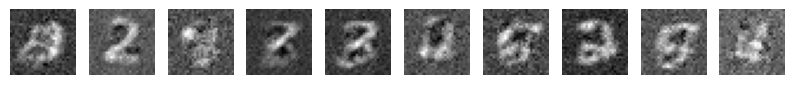

Current epoch is 100


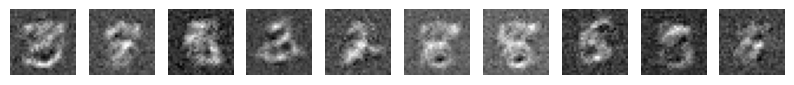

Current epoch is 110


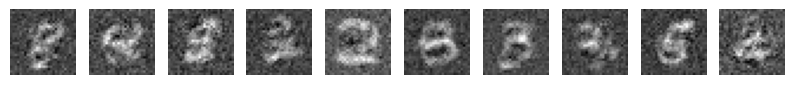

Current epoch is 120


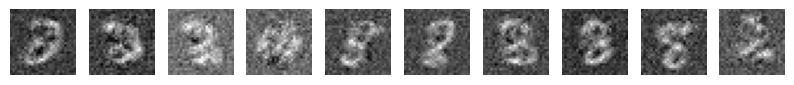

Current epoch is 130


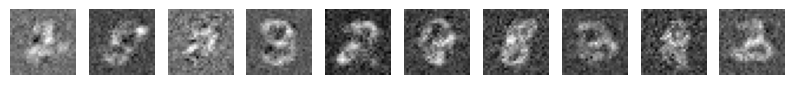

Current epoch is 140


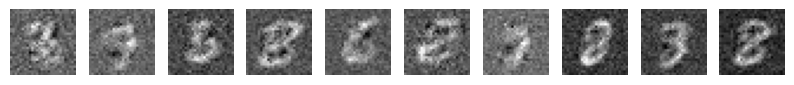

Current epoch is 150


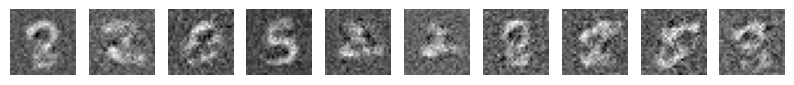

Current epoch is 160


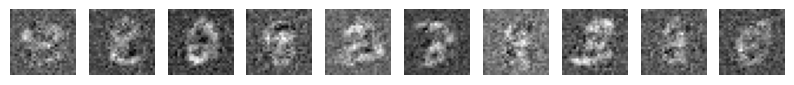

Current epoch is 170


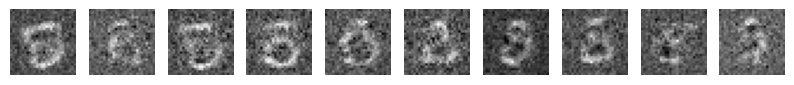

Current epoch is 180


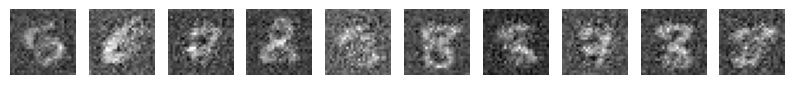

Current epoch is 190


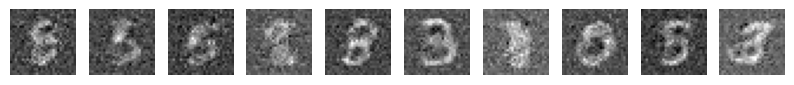

Current epoch is 200


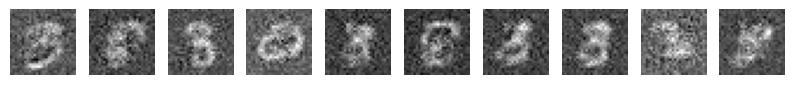

Current epoch is 210


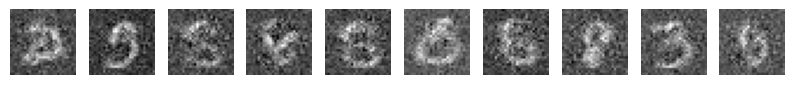

Current epoch is 220


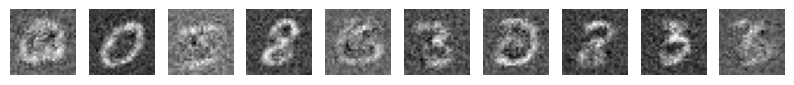

Current epoch is 230


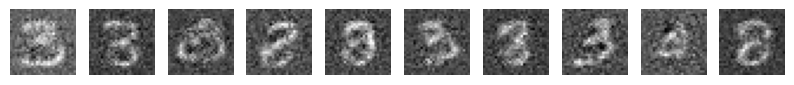

Current epoch is 240


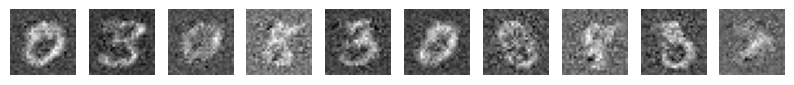

Current epoch is 250


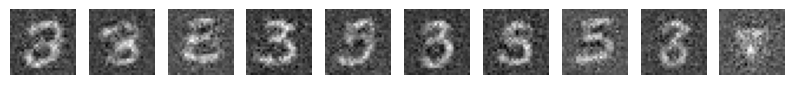

Current epoch is 260


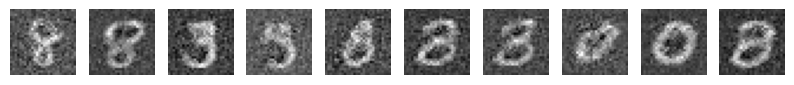

Current epoch is 270


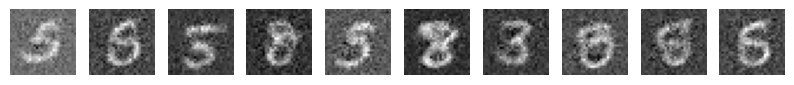

Current epoch is 280


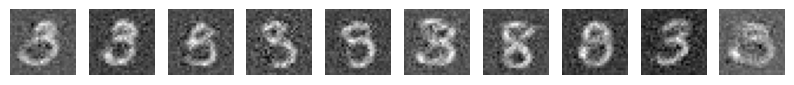

Current epoch is 290


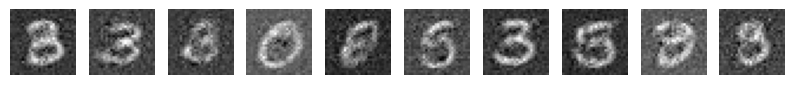

Current epoch is 300


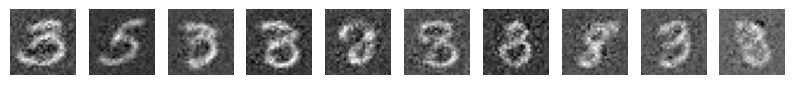

Current epoch is 310


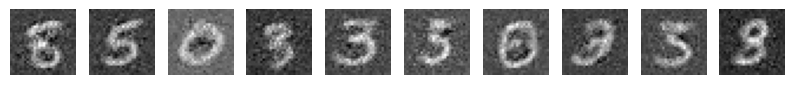

Current epoch is 320


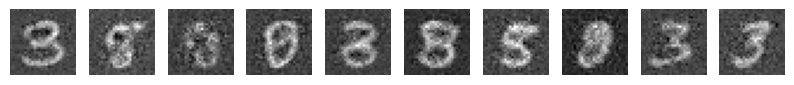

Current epoch is 330


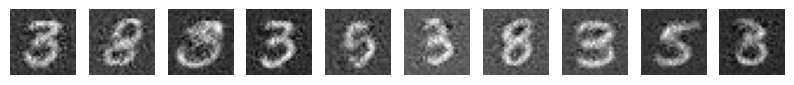

Current epoch is 340


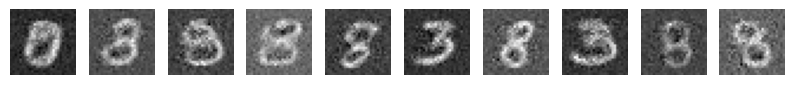

Current epoch is 350


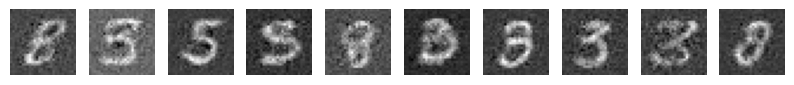

Current epoch is 360


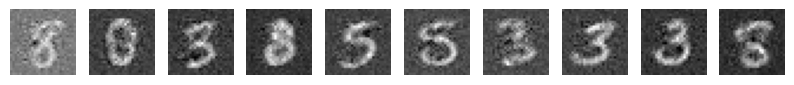

Current epoch is 370


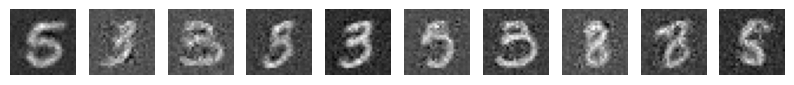

Current epoch is 380


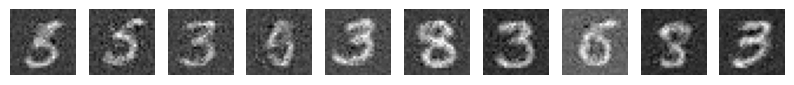

Current epoch is 390


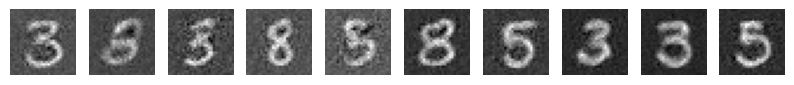

Current epoch is 400


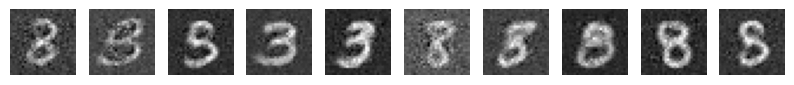

Current epoch is 410


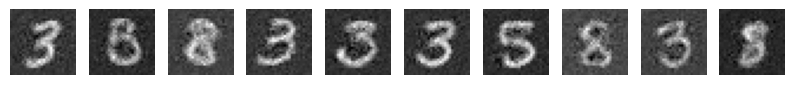

Current epoch is 420


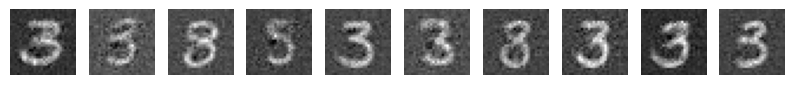

Current epoch is 430


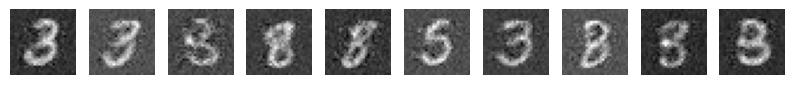

Current epoch is 440


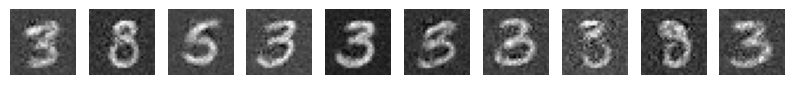

Current epoch is 450


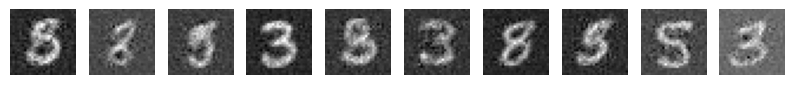

Current epoch is 460


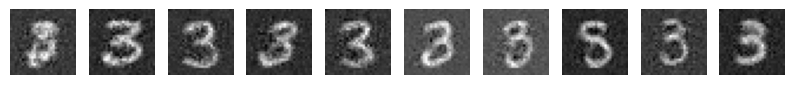

Current epoch is 470


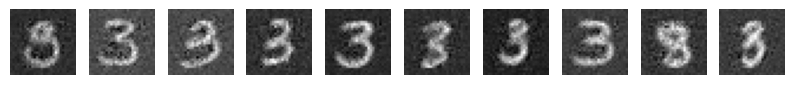

Current epoch is 480


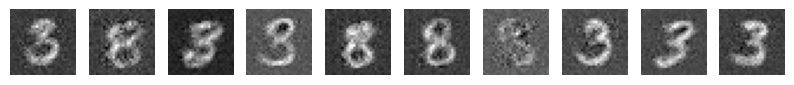

Current epoch is 490


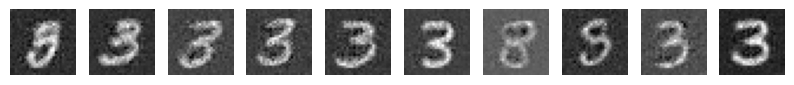

In [22]:
# Training loop
for epoch in range(epochs):
    for step, images in enumerate(dataset):
        train_step(images)

    if epoch%10 == 0:
      print(f"Current epoch is {epoch}")

      # Generate samples after each epoch
      random_latent_vectors = tf.random.normal([10, latent_dim])
      generated_images = generator(random_latent_vectors, training=False)

      # Reshape the generated images
      generated_images = generated_images.numpy().reshape(-1, 28, 28)

      # Display the generated images
      plt.figure(figsize=(10, 1))
      for i in range(10):
          plt.subplot(1, 10, i + 1)
          plt.imshow(generated_images[i], cmap='gray')
          plt.axis('off')
      plt.show()


